# Step 1: Load the Data

#### load the data from the CSV files using Pandas and observe the first few rows of each dataset.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

# Display the first few rows of each dataframe
print("Species Info:")
print(species_info.head())

print("\nObservations:")
print(observations.head())


Species Info:
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  

Observations:
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Pru

# Step 2: Get Acquainted with the Data

#### We will check for missing values and get a summary of the data.

In [13]:
# Check for missing values
print("Missing values in species_info:")
print(species_info.isnull().sum())

print("\nMissing values in observations:")
print(observations.isnull().sum())

# Summary statistics
print("\nSummary statistics for species_info:")
print(species_info.describe(include='all'))

print("\nSummary statistics for observations:")
print(observations.describe())


Missing values in species_info:
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

Missing values in observations:
scientific_name    0
park_name          0
observations       0
dtype: int64

Summary statistics for species_info:
              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  

Summary statistics for observations:
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


# Step 3: Distribution of Conservation Status

#### visualize the distribution of conservation statuses for the species

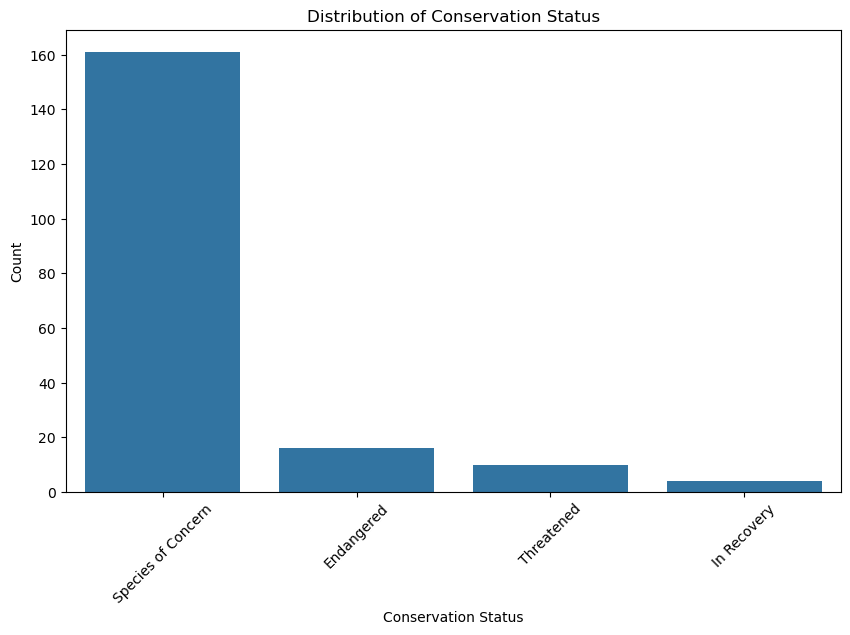

In [19]:
# Count of each conservation status
conservation_counts = species_info['conservation_status'].value_counts().reset_index()
conservation_counts.columns = ['conservation_status', 'count']

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=conservation_counts, x='conservation_status', y='count')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.title('Distribution of Conservation Status')
plt.xticks(rotation=45)
plt.show()


# Step 4: Analyze Types of Species More Likely to be Endangered

#### analyze if certain types of species are more likely to be endangered.

<Figure size 1200x800 with 0 Axes>

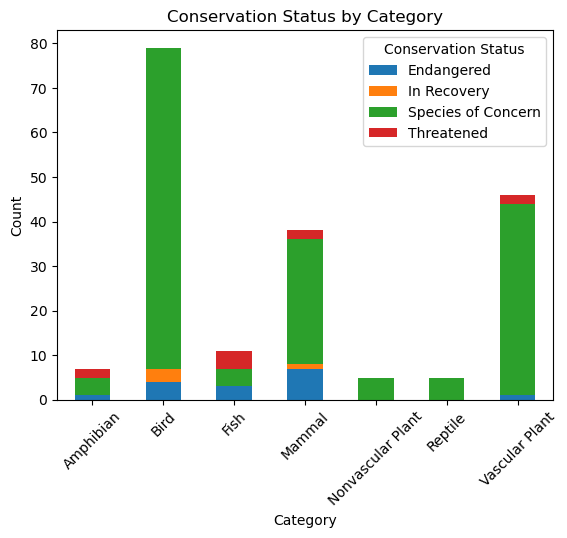

In [23]:
# Count of species by category and conservation status
category_conservation = species_info.groupby(['category', 'conservation_status']).size().unstack().fillna(0)

# Plot the data
plt.figure(figsize=(12, 8))
category_conservation.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Conservation Status by Category')
plt.xticks(rotation=45)
plt.legend(title='Conservation Status')
plt.show()


# Step 5: Statistical Significance of Differences

#### use statistical tests to check if the differences between species and their conservation statuses are significant.

In [27]:
from scipy.stats import chi2_contingency

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(category_conservation)

print(f"Chi-squared Test: chi2={chi2}, p-value={p}")


Chi-squared Test: chi2=53.91636314015659, p-value=1.8909788349761653e-05


# Step 6: Most Spotted Species at Each Park

#### identify the species that were spotted the most at each park.

In [31]:
# Aggregate observations by species and park
species_park_observations = observations.groupby(['park_name', 'scientific_name']).sum().reset_index()

# Find the most observed species in each park
most_observed_species = species_park_observations.loc[species_park_observations.groupby('park_name')['observations'].idxmax()]

# Display the results
print("Most observed species in each park:")
print(most_observed_species)


Most observed species in each park:
                                 park_name        scientific_name  \
1359                   Bryce National Park          Columba livia   
10534  Great Smoky Mountains National Park  Streptopelia decaocto   
13534            Yellowstone National Park         Holcus lanatus   
19178               Yosemite National Park   Hypochaeris radicata   

       observations  
1359            339  
10534           256  
13534           805  
19178           505  


# Step 7:  Bar plot to show the most observed species in each park along with the number of observations

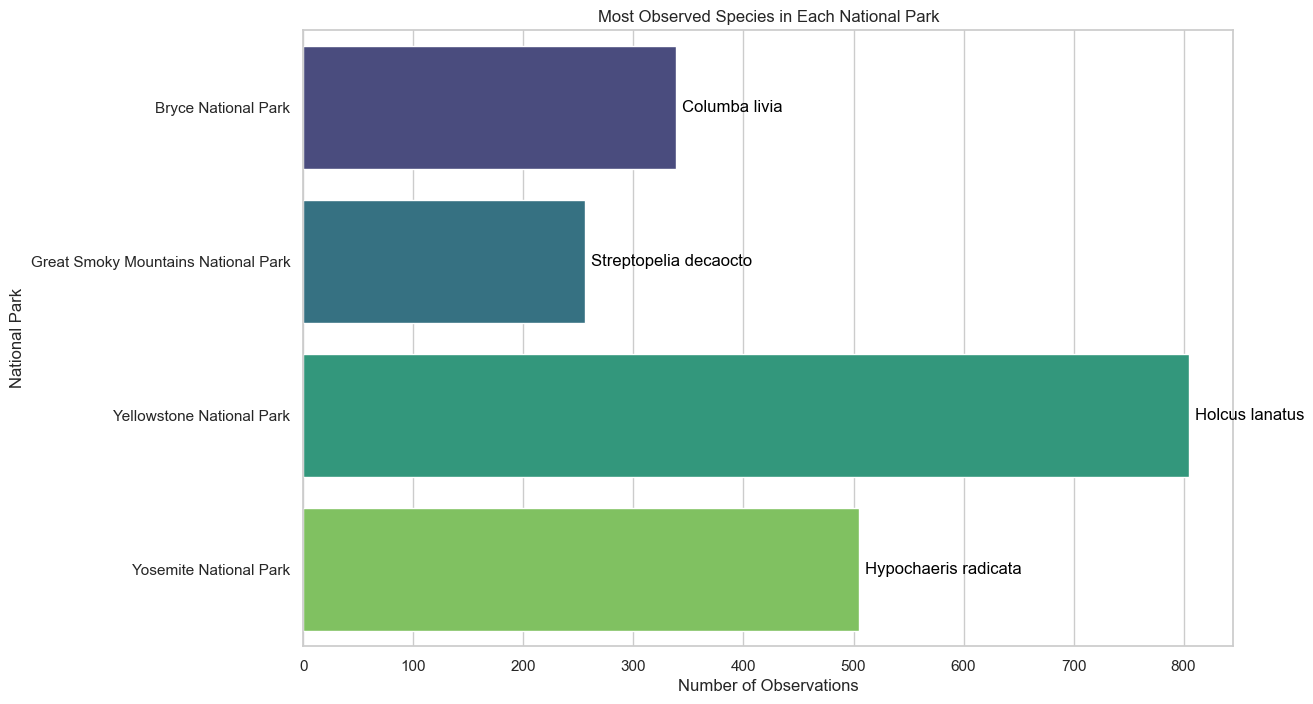

In [37]:
# Data for the most observed species in each park
data = {
    'park_name': [
        'Bryce National Park', 
        'Great Smoky Mountains National Park', 
        'Yellowstone National Park', 
        'Yosemite National Park'
    ],
    'scientific_name': [
        'Columba livia', 
        'Streptopelia decaocto', 
        'Holcus lanatus', 
        'Hypochaeris radicata'
    ],
    'observations': [339, 256, 805, 505]
}

# Create a DataFrame
most_observed_df = pd.DataFrame(data)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the bar plot with hue and legend set to False
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='observations', 
    y='park_name', 
    data=most_observed_df, 
    hue='park_name', 
    dodge=False, 
    palette='viridis'
)
# barplot.legend_.remove()

# Add the species names as labels on the bars
for index, value in enumerate(data['observations']):
    barplot.text(value + 5, index, data['scientific_name'][index], color='black', va="center")

# Add titles and labels
plt.title('Most Observed Species in Each National Park')
plt.xlabel('Number of Observations')
plt.ylabel('National Park')

# Show the plot
plt.show()